# Time Series Aanalysis

En este Notebook haremos uso de la libreria prophet de Facebook para predecir el precio del bitcoin en base al sentimiento en twitter en ese instante.

## Imports

In [1]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.graph_objs as go


from JABA.service.scrapper import DFPicker
import pandas as pd

## Prophet

### Pick the data

Haremos uso de la funcion **get_complete_df(dateFrom, dateTo)** de **DFPicker** para recopilar los datos de las fechas de las que queremos realizar la observacion

In [8]:
date_init = "2017-01-02"
date_limit = "2021-06-15"
df = DFPicker.get_complete_df(date_init, date_limit)
data = { 'ds': df.index.values,
         'y': df.Close}
prophet_df = pd.DataFrame(data, columns=['ds', 'y'])
prophet_df.reset_index(drop=True, inplace=True)
print(prophet_df.tail())


Current Date 2018-01-01
Current Date 2019-01-01
Current Date 2020-01-01
Current Date 2021-01-01
Current Date 2018-01-01
Current Date 2019-01-01
Current Date 2020-01-01
Current Date 2021-01-01
Extraction Completed!
                       ds             y
77316 2021-06-14 21:30:00  40132.987000
77317 2021-06-14 22:00:00  40213.904667
77318 2021-06-14 22:30:00  40212.000667
77319 2021-06-14 23:00:00  40283.360667
77320 2021-06-14 23:30:00  40448.208000


### Model Evaluation

                       ds
0     2017-01-02 00:00:00
1     2017-01-02 00:30:00
2     2017-01-02 01:00:00
3     2017-01-02 01:30:00
4     2017-01-02 02:00:00
...                   ...
77416 2021-09-18 23:30:00
77417 2021-09-19 23:30:00
77418 2021-09-20 23:30:00
77419 2021-09-21 23:30:00
77420 2021-09-22 23:30:00

[77421 rows x 1 columns]
<bound method NDFrame.tail of                      sentiment_v  Datetime  sentiment_v2         Close
2017-01-02 00:00:00    64.974757       185     45.547100    998.174000
2017-01-02 00:30:00    60.986679       154     43.663361    997.968000
2017-01-02 01:00:00    41.555880       164     35.660829    997.753333
2017-01-02 01:30:00    44.695415       129     30.961104    998.275000
2017-01-02 02:00:00    42.712867       153     32.400544    998.551333
...                          ...       ...           ...           ...
2021-06-14 21:30:00  1047.822439      2107    943.018819  40132.987000
2021-06-14 22:00:00   980.775571      2029    864.545205  40213.

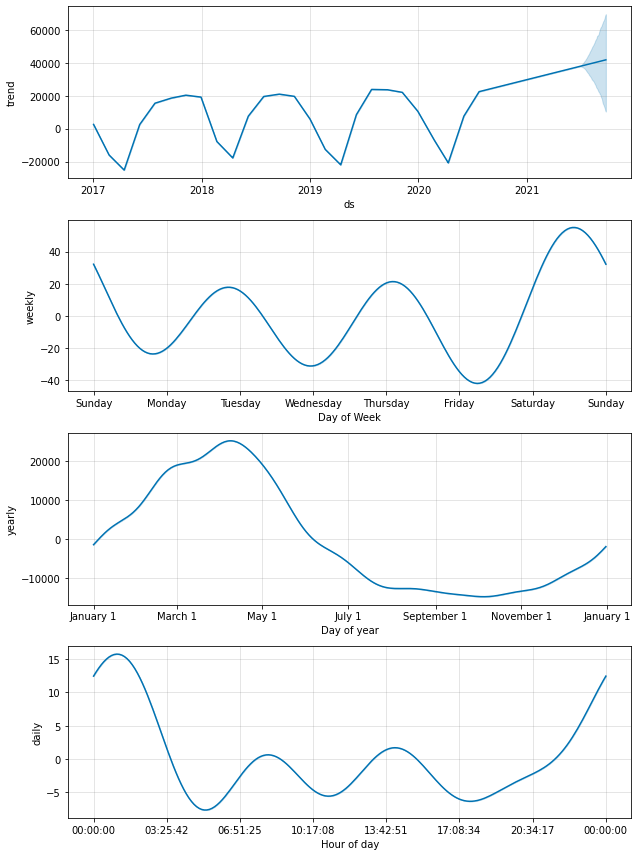

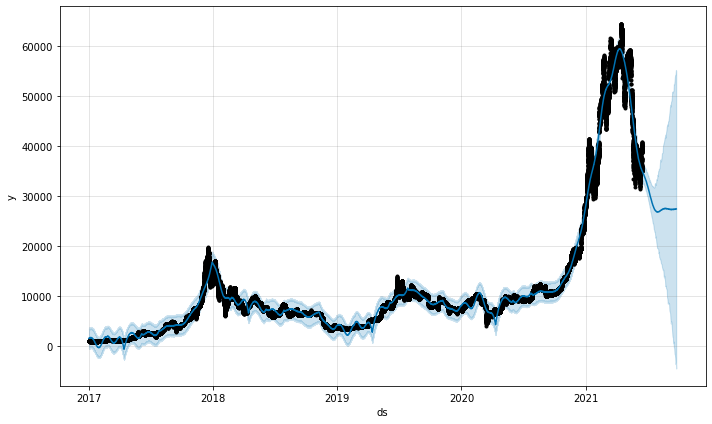

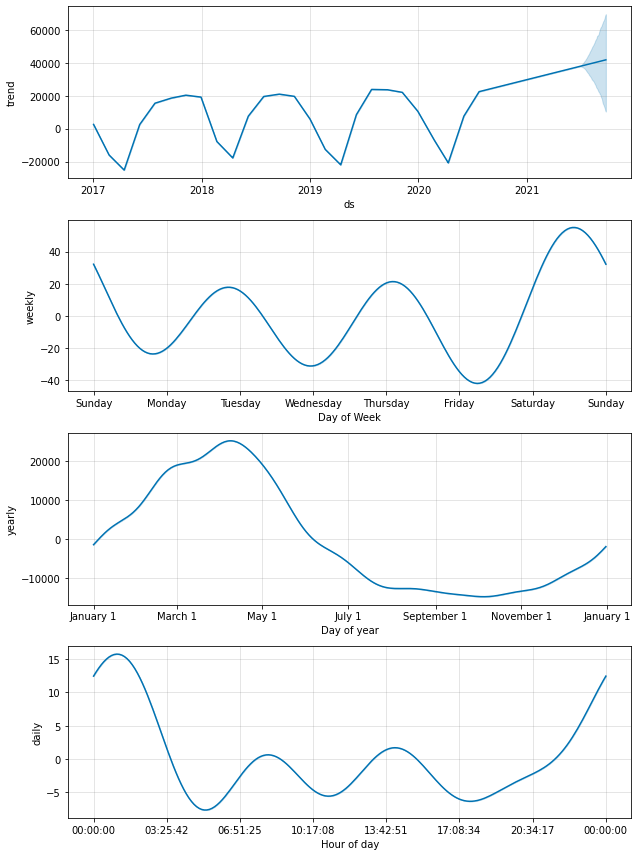

In [12]:
#prophet_df = DFPicker.add_null_rows(prophet_df, 200)
model = Prophet()
model.fit(prophet_df)
future = model.make_future_dataframe(periods=100)
print(future)
forecast = model.predict(future)
print(df.tail)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())
model.plot(forecast)
model.plot_components(forecast)




## ARMA